#### Done as part of a larger project for a class in the first semester of my MS Applied Data Science program.

#### Dated January 2021

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr 
from sklearn.feature_selection import RFE
import warnings

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('top_ten.csv', encoding = 'ISO-8859-1')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df2 = df[df.year >= 2018]

In [6]:
df2.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
508,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86
509,Havana (feat. Young Thug),Camila Cabello,dance pop,2018,105,52,77,-4,13,39,217,18,3,85
510,I Like It,Cardi B,pop,2018,136,73,82,-4,37,65,253,10,13,85
511,New Rules,Dua Lipa,dance pop,2018,116,70,76,-6,15,61,209,0,7,84
512,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2018,122,81,87,-4,8,97,199,38,6,84


In [7]:
df2.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,2018.326316,113.894737,65.231579,68.021053,-5.705263,14.884211,49.431579,211.789474,15.705263,8.463158,76.326316
std,0.471352,21.439908,14.483632,12.628050,1.549699,11.576630,22.009985,31.986664,19.876145,6.914078,10.899387
min,2018.000000,77.000000,30.000000,26.000000,-10.000000,2.000000,9.000000,148.000000,0.000000,3.000000,44.000000
25%,2018.000000,97.500000,57.500000,59.000000,-7.000000,8.500000,33.500000,191.000000,3.000000,4.500000,69.500000
50%,2018.000000,107.000000,67.000000,69.000000,-6.000000,11.000000,48.000000,209.000000,8.000000,6.000000,77.000000
75%,2019.000000,125.000000,76.000000,76.000000,-5.000000,16.000000,62.500000,220.500000,19.000000,9.000000,84.000000
max,2019.000000,180.000000,89.000000,97.000000,-3.000000,74.000000,97.000000,341.000000,84.000000,37.000000,99.000000


In [8]:
len(df2)

95

The following are the top scoring songs in each category.

In [9]:
df2[df2.bpm == np.max(df2.bpm)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
517,Dusk Till Dawn - Radio Edit,ZAYN,dance pop,2018,180,44,26,-7,11,10,239,10,4,83


In [10]:
df2[df2.nrgy == np.max(df2.nrgy)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90
589,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,2019,122,89,81,-4,8,61,229,2,4,84


In [11]:
df2[df2.dnce == np.max(df2.dnce)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
539,Bad Liar,Selena Gomez,dance pop,2018,121,41,97,-6,8,73,215,19,7,75
570,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,8,27,264,5,26,45


In [12]:
df2[df2.live == np.max(df2.live)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90


In [13]:
df2[df2.val == np.max(df2.val)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
512,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2018,122,81,87,-4,8,97,199,38,6,84


In [14]:
df2[df2.acous == np.max(df2.acous)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


In [15]:
df2[df2.spch == np.max(df2.spch)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
542,Chun-Li,Nicki Minaj,dance pop,2018,129,73,69,-5,11,48,192,28,37,73


In [16]:
df2[df2['pop'] == np.max(df2['pop'])]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


Top 10 most frequently appearing artists over the course of the two years.

In [17]:
df2.artist.value_counts().head(10)

Ed Sheeran           6
Shawn Mendes         5
Maroon 5             4
The Chainsmokers     4
Selena Gomez         3
Justin Timberlake    3
Taylor Swift         3
Dua Lipa             3
Cardi B              2
Camila Cabello       2
Name: artist, dtype: int64

Heat map displaying correlation between variables

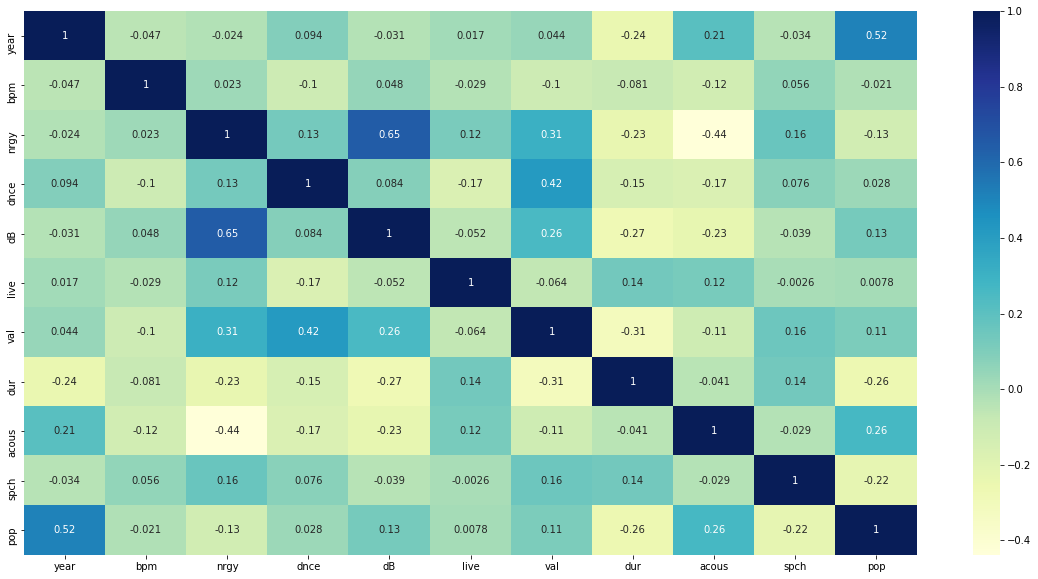

In [18]:
plt.figure(figsize = (20, 10)) 
sns.heatmap(df2.corr(), annot = True, cmap = 'YlGnBu') 
plt.show()

In [19]:
df3 = df2.rename(columns={'title':'song', 'artist':'artist', 
                          'top genre':'genre', 'year':'year', 
                          'bpm':'bpm', 'nrgy':'energy', 
                          'dnce':'danceability', 'dB':'loudness', 
                          'live':'liveness', 'val':'valence', 
                          'dur':'duration', 'acous':'acousticness',
                          'spch':'speechiness', 'pop':'popularity'})

In [20]:
df3.head()

,song,artist,genre,year,bpm,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
508,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86
509,Havana (feat. Young Thug),Camila Cabello,dance pop,2018,105,52,77,-4,13,39,217,18,3,85
510,I Like It,Cardi B,pop,2018,136,73,82,-4,37,65,253,10,13,85
511,New Rules,Dua Lipa,dance pop,2018,116,70,76,-6,15,61,209,0,7,84
512,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2018,122,81,87,-4,8,97,199,38,6,84


Visualizations of the distributions of values in each category

<AxesSubplot:xlabel='popularity', ylabel='Density'>

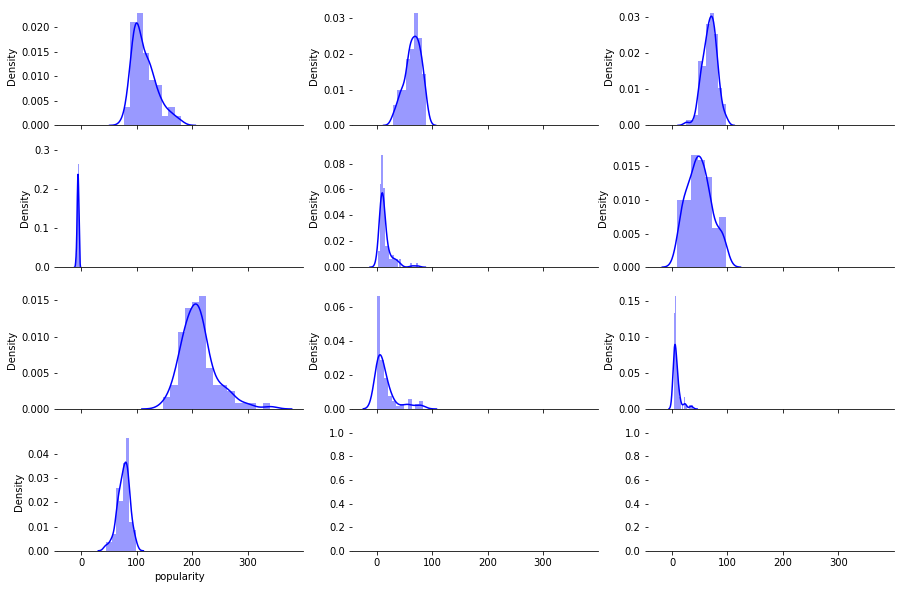

In [21]:
f, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True)
sns.despine(left=True)
sns.distplot(df3.bpm, color="b", ax=axes[0, 0])
sns.distplot(df3.energy,color="b", ax=axes[0, 1])
sns.distplot(df3.danceability, color="b", ax=axes[0, 2])
sns.distplot(df3.loudness, color="b", ax=axes[1, 0])
sns.distplot(df3.liveness, color="b", ax=axes[1, 1])
sns.distplot(df3.valence, color="b", ax=axes[1, 2])
sns.distplot(df3.duration, color="b", ax=axes[2, 0])
sns.distplot(df3.acousticness, color="b", ax=axes[2, 1])
sns.distplot(df3.speechiness, color="b", ax=axes[2, 2])
sns.distplot(df3.popularity, color="b", ax=axes[3, 0])

In [22]:
df3.genre.unique()

array(['dance pop', 'pop', 'canadian pop', 'edm', 'barbadian pop',
       'brostep', 'hip hop', 'electropop', 'contemporary country',
       'latin', 'detroit hip hop', 'downtempo', 'moroccan pop',
       'escape room', 'boy band', 'alternative r&b', 'big room',
       'electronic trap'], dtype=object)

We notice that the genre field includes values that are really subgenres of genres that are already represented in the dataset. We can simplify things by grouping these subgenres under their parent genres.

In [23]:
df3.loc[df3['genre'].str.contains('pop', case=False), 'genre'] = 'Pop'

In [24]:
df3.loc[df3['genre'].str.contains('hip hop', case=False), 'genre'] = 'Hip Hop'

In [25]:
df3.loc[df3['genre'].str.contains('trap', case=False), 'genre'] = 'Hip Hop'

In [26]:
df3.genre.unique()

array(['Pop', 'edm', 'brostep', 'Hip Hop', 'contemporary country',
       'latin', 'downtempo', 'escape room', 'boy band', 'alternative r&b',
       'big room'], dtype=object)

Distribution of variable genre

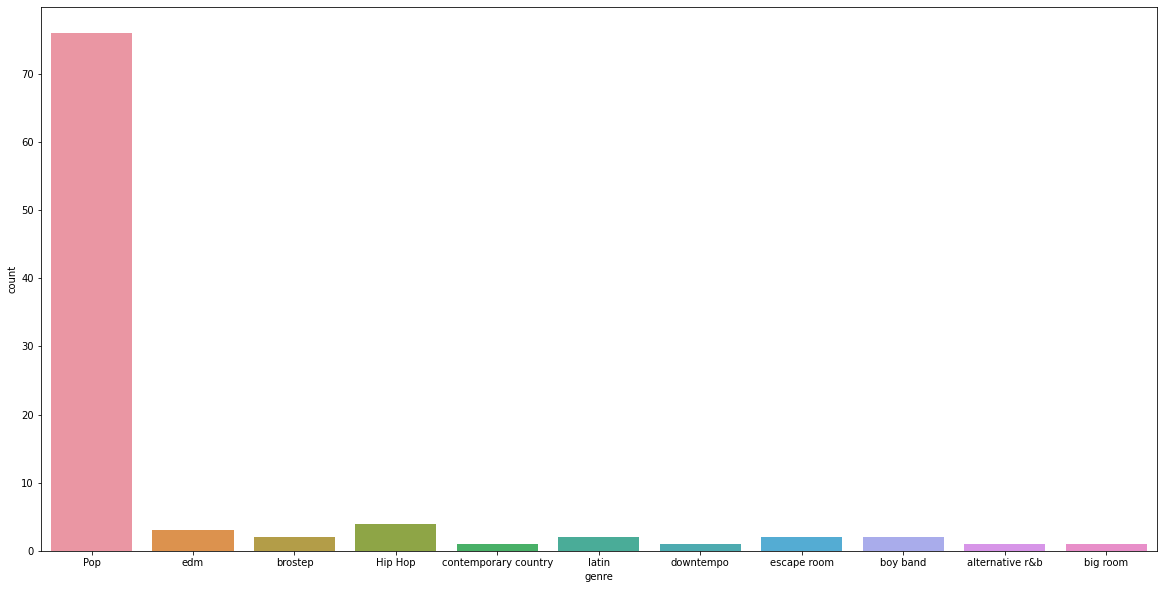

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(df3['genre'])
plt.show()

In [28]:
df3.genre.value_counts()

Pop                     76
Hip Hop                  4
edm                      3
latin                    2
boy band                 2
brostep                  2
escape room              2
big room                 1
downtempo                1
contemporary country     1
alternative r&b          1
Name: genre, dtype: int64

In [29]:
df2018 = df3[df3.year == 2018]
df2019 = df3[df3.year == 2019]

In [30]:
print(len(df2018), 'of the songs in the dataset were released in 2018.')
print(len(df2019), 'of the songs in the dataset were released in 2019.')

64 of the songs in the dataset were released in 2018.
31 of the songs in the dataset were released in 2019.


Drop irrelevant fields.

In [31]:
df18 = df2018.drop(['song', 'artist', 'genre', 'year'], axis =1)
df19 = df2019.drop(['song', 'artist', 'genre', 'year'], axis =1)

In [32]:
# Columns corresponding to the independent variables
X = df18.iloc[:, 0:-1]
X

,bpm,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness
508,124,86,79,-3,8,59,215,4,11
509,105,52,77,-4,13,39,217,18,3
510,136,73,82,-4,37,65,253,10,13
511,116,70,76,-6,15,61,209,0,7
512,122,81,87,-4,8,97,199,38,6
...,...,...,...,...,...,...,...,...,...
567,120,55,79,-7,13,23,226,1,5
568,110,76,75,-8,20,58,248,0,5
569,160,84,58,-5,10,50,190,13,22
570,130,59,97,-8,8,27,264,5,26


In [33]:
X_test  = df19.iloc[:, 0:-1]
y_train = df18.popularity
y_test  = df19.popularity

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
df4 = pd.DataFrame({'Predicted Popularity': y_pred,
                   'Actual Popularity': y_test})

In [39]:
df4['Error'] = df4['Predicted Popularity'] - df4['Actual Popularity'] 

In [40]:
df4

,Predicted Popularity,Actual Popularity,Error
572,77.046854,99,-21.953146
573,70.182982,97,-26.817018
574,78.904737,96,-17.095263
575,76.505454,95,-18.494546
576,71.554796,93,-21.445204
577,72.319609,92,-19.680391
578,79.166929,92,-12.833071
579,78.618884,90,-11.381116
580,80.450689,90,-9.549311
581,85.282347,90,-4.717653


In [41]:
coefs = {'Features': X.columns, 'Coefficient': regressor.coef_}
coefs_df = pd.DataFrame(coefs)
coefs_df

,Features,Coefficient
0,bpm,1.228903
1,energy,-1.997289
2,danceability,-0.025760
3,loudness,3.187192
4,liveness,1.557431
5,valence,1.680185
6,duration,-0.618260
7,acousticness,0.644159
8,speechiness,-1.936261


In [42]:
mean_squared_error(y_pred, y_test)

184.22256152392328